# Areas

Brian Li

09/10/2023

In [2]:
import geopandas

import matplotlib.pyplot as plt

countries = geopandas.read_file("https://michaelminn.net/tutorials/data/2019-world-energy-indicators.geojson")

countries = countries.to_crs("EPSG:3857")

countries.columns

Index(['Country_Code', 'Country_Name', 'Longitude', 'Latitude', 'WB_Region',
       'WB_Income_Group', 'Population', 'GNI_PPP_B_Dollars',
       'GDP_per_Capita_PPP_Dollars', 'MJ_per_Dollar_GDP',
       'Fuel_Percent_Exports', 'Resource_Rent_Percent_GDP',
       'Exports_Percent_GDP', 'Imports_Percent_GDP', 'Industry_Percent_GDP',
       'Agriculture_Percent_GDP', 'Military_Percent_GDP', 'Gini_Index',
       'Land_Area_sq_km', 'Arable_Land_HA_per_Capita', 'CO2_per_Capita_Tonnes',
       'HDI', 'Regime_Type', 'Democracy_Index', 'CO2_Emissions_MM_Tonnes',
       'Primary_Consumption_Quads', 'Coal_Consumption_Quads',
       'Gas_Consumption_Quads', 'Oil_Consumption_Quads',
       'Nuclear_Consumption_Quads', 'Renewable_Consumption_Quads',
       'Primary_Production_Quads', 'Coal_Production_Quads',
       'Gas_Production_Quads', 'Oil_Production_Quads',
       'Nuclear_Production_Quads', 'Renewable_Production_Quads',
       'Electricity_Capacity_gW', 'Electricity_Generation_tWh',
       'El

The column name of the indicator is Nuclear_Production_Quads.

The unit for Nuclear_Production_Quads is one quadrillion BTU.

The indicator represents the "total annual primary energy production from nuclear generation in quadrillion BTU" (https://michaelminn.net/tutorials/data/2019-world-energy-indicators-metadata.html).

I chose this indicator because nuclear energy is interesting to me.

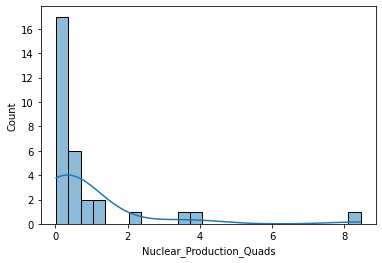

3.4896029103604955


In [3]:
import seaborn as sns

axis = sns.histplot(countries["Nuclear_Production_Quads"], kde=True)

plt.show()

print(countries["Nuclear_Production_Quads"].skew())

"The distribution of a set of values is the manner in which the values are spread across the possible range of values" (https://michaelminn.net/tutorials/python-areas/).

The distribution is skewed right, since it is very high.

In [6]:
countries["Nuclear_Production_Quads"].describe()

count    31.000000
mean      0.895935
std       1.690147
min       0.024000
25%       0.130000
50%       0.323000
75%       0.678000
max       8.452000
Name: Nuclear_Production_Quads, dtype: float64

In [7]:
renewables = countries[["Country_Name", "Nuclear_Production_Quads"]].dropna()

renewables["Rank"] = renewables["Nuclear_Production_Quads"].rank(ascending=False)

renewables = renewables.sort_values("Rank", ascending=True)

renewables.head()

,Country_Name,Nuclear_Production_Quads,Rank
164,United States of America,8.452,1.0
53,France,3.940,2.0
30,China,3.568,3.0
129,Russia,2.106,4.0
142,South Korea,1.343,5.0


In [8]:
renewables.tail()

,Country_Name,Nuclear_Production_Quads,Rank
4,Argentina,0.093,27.0
71,Iran,0.061,28.0
137,Slovenia,0.056,29.0
107,Netherlands,0.036,30.0
5,Armenia,0.024,31.0


The median is the appropriate central tendency variable to describe the variable Nuclear_Production_Quads because the graph is very skewed.

The higher ranked countries have such high values because countries tend to either have a lot of nuclear power or none at all.

The lower ranked countries have very low values because countries without nuclear capability or large economies will struggle to construct nuclear power plants.

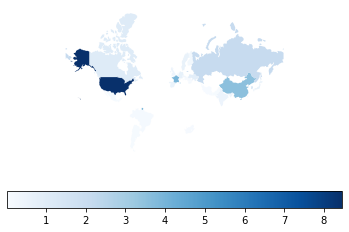

In [10]:
axis = countries.plot("Nuclear_Production_Quads", cmap = "Blues", legend=True, legend_kwds={"orientation":"horizontal"})

axis.set_axis_off()

plt.show()

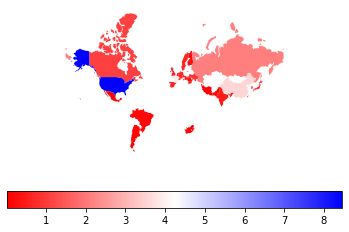

In [13]:
axis = countries.plot("Nuclear_Production_Quads", cmap = "bwr_r", legend=True, legend_kwds={"orientation":"horizontal"})

axis.set_axis_off()

plt.show()

"Choropleths that use a range of levels of brightness of a single hue are commonly used for mapping continuous variables" (https://michaelminn.net/tutorials/python-areas/).

"A diverging color choropleth uses a colormap based on two opposite hues separated by a neutral color like white or gray" (https://michaelminn.net/tutorials/python-areas/).

"The use of diverging color makes it easier to see the difference between areas of low or high values" (https://michaelminn.net/tutorials/python-areas/).

"You should generally avoid any color choices that require being able to distinguish between red and green in order to make your maps accessible to the 8% of men of European ancestry who are red-green color blind" (https://michaelminn.net/tutorials/python-areas/).

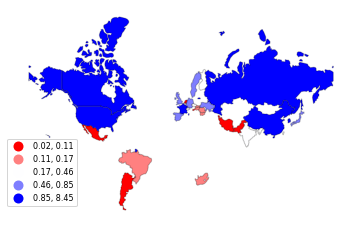

In [16]:
axis = countries.plot("Nuclear_Production_Quads", legend=True, cmap = "bwr_r", scheme="quantiles", edgecolor = "#00000040", legend_kwds={"fontsize":8, "bbox_to_anchor":(0.2, 0.4)})

axis.set_axis_off()

plt.show()

"A classified choropleth groups ranges of variable values into classes displayed with a limited set of colors (usually five to seven) that make it easier to identify areas with similar values" (https://michaelminn.net/tutorials/python-areas/).

I chose the quantiles classification method because the data was highly skewed.

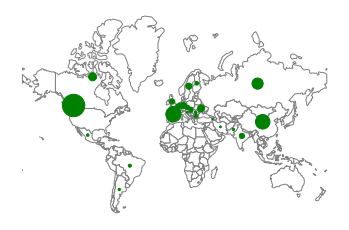

In [17]:
centroids = countries.copy()

centroids["geometry"] = centroids.centroid

centroids = centroids.dropna()

centroids["size"] = 500 * centroids["Nuclear_Production_Quads"] / max(centroids["Nuclear_Production_Quads"])

basemap = countries.plot(facecolor='white', edgecolor='gray')

axis = centroids.plot(ax=basemap, markersize="size", color="green", categorical=False, legend=True)

axis.set_axis_off()

plt.show()

"A graduated symbol map uses differently sized symbols to map variable values" (https://michaelminn.net/tutorials/python-areas/).

"Counts are variables that indicate size, such as the size of the population" (https://michaelminn.net/tutorials/python-areas/).

One count variable is Nuclear_Production_Quads.

"With choropleth maps our eyes see the land area as the size, and when the size indicated by the variable is not the same as the sizes of the areas, we get an incorrect impression of where the larger and smaller values are located" (https://michaelminn.net/tutorials/python-areas/).

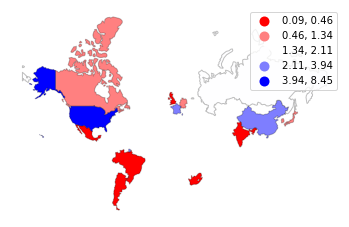

In [18]:
g20 = countries[countries.Country_Code.isin(["ARG", "AUS", "BRA", "CAN", "CHN", "DEU", "FRA", "GBR", "IDN", "IND", "ITA", "JPN", "MEX", "KOR", "RUS", "SAU", "TUR", "USA", "ZAF"])]

axis = g20.plot("Nuclear_Production_Quads", legend=True, cmap = "bwr_r", edgecolor = "#00000040", scheme="naturalbreaks")

axis.set_axis_off()

plt.show()